In [1]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
import torch.optim as optim
from IPython import display

In [2]:
batch_size_train = 64
batch_size_test = 64

# prepair the dataset
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('dataset/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('dataset/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [50]:
class Generator(nn.Module):
    def __init__(self, output_size):
        super(Generator, self).__init__()
        
        self.output_size = output_size
        
        self.fc1 = nn.Linear(128,512)
        
        self.fc2 = nn.Linear(512,64)
        
        self.fc3 = nn.Linear(64, output_size * output_size)
        
    
    def forward(self, x):
        
        x = torch.relu(self.fc1(x))
        
        x = torch.relu(self.fc2(x))
        
        x = torch.tanh(self.fc3(x))  
        x = x.reshape(-1, 1, self.output_size, self.output_size)
        print(x.shape)
        return x
        

In [124]:
class Discriminator(nn.Module):
    def __init__(self, input_size):        
        super(Discriminator, self).__init__()
        
        self.input_size = input_size
        
        x_in = input_size * input_size
        self.fc1 = nn.Linear(x_in, 512)
        
        self.fc2 = nn.Linear(512, self.input_size**2)
        
        self.fc3 = nn.Linear(self.input_size**2, 1)
    
    def forward(self, x):
        '''
            receives an images n x n
        '''
        x = x.view(-1, 1, self.input_size**2)
        print(x.shape)
        x = torch.relu(self.fc1(x))
        
        x = torch.relu(self.fc2(x))
        
        x = torch.tanh(self.fc3(x))
        x = torch.squeeze(x,2)
        print("output discriminator: ", x.shape)
        
        return x

In [125]:
size_image = 28
img = torch.rand(size_image, size_image)

In [126]:
import matplotlib.pyplot as plt

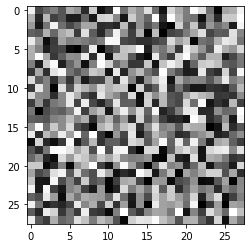

In [127]:
plt.imshow(img.data.numpy(), cmap='gray')

In [128]:
disc = Discriminator(size_image)
gen = Generator(size_image)

In [129]:
noise = torch.rand(128)
gen_image = gen(noise)
print(gen_image.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])


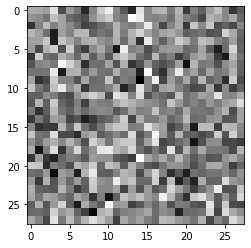

In [130]:
plt.imshow(gen_image.data.numpy().reshape(size_image,size_image), cmap='gray')

In [131]:
pred = disc(gen_image)
print(pred)

torch.Size([1, 1, 784])
output discriminator:  torch.Size([1, 1])
tensor([[-0.0250]], grad_fn=<SqueezeBackward1>)


In [132]:
def discriminator_loss(real_output, fake_output):
    real_loss = F.cross_entropy(torch.ones_like(real_output), real_output)
    fake_loss = F.cross_entropy(torch.zeros_like(fake_output), fake_output)
    
    total_loss = real_loss + fake_loss
    
    return total_loss

def generator_loss(fake_output):
    loss = F.cross_entropy(torch.ones_like(fake_output), fake_output)
    
    return loss

In [133]:
generator_optimizer = optim.Adam(gen.parameters(), lr=0.01)
discriminator_optimizer = optim.Adam(disc.parameters(), lr=0.01)

In [134]:
NUM_EPOCHS = 10
BATCH_SIZE = 32
noise_dim = 128
num_examples_gen = 32
torch.seed = 129

In [139]:
def train_step(images):    
    noise = torch.randn(BATCH_SIZE, noise_dim)
    gen_images = gen(noise)
    
    print(gen_images.shape)
    print(images.shape)
    real_images = disc(images)
    fake_images = disc(gen_images)
    
    gen_loss = generator_loss(fake_images)
    #real_images = torch.squeeze(real_images,2)
    #fake_images = torch.squeeze(fake_images,2)
    print(real_images.shape)
    print(fake_images.shape)
    disc_loss = discriminator_loss(real_images, fake_images)
    
    gen_loss.backward()
    disc_loss.backward()
    
    generator_optimizer.zero_grad()
    generator_optimizer.step()
    
    discriminator_optimizer.zero_grad()
    discriminator_optimizer.step()   
    

In [140]:
import time
def display_images(images):
    fig = plt.figure()
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.tight_layout()
        plt.imshow(images[i][0], cmap='gray', interpolation='none')
        # plt.title("Ground Truth: {}".format(example_targets[i]))
        plt.xticks([])
        plt.yticks([])
    fig

In [141]:
def train(dataset, epochs):             
    for epoch_i in range(epochs):
        for i, (image_batch, image_targets) in enumerate(dataset):         
            
            batch_size = image_batch.shape[0]
            
            #print(image_batch.shape, image_targets)
            train_step(image_batch)
            
            noise = torch.randn(9, noise_dim)
            genenerated_images = gen(noise)
            
            display_images(genenerated_images)
            
            break
        break    
        

In [142]:
train(train_loader, NUM_EPOCHS)

torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 784])
output discriminator:  torch.Size([64, 1])
torch.Size([32, 1, 784])
output discriminator:  torch.Size([32, 1])


RuntimeError: the derivative for 'target' is not implemented

In [30]:
28**2

784